Auswahlkriterium: MAX abs(median(P_MW)) mit MIN_COVERAGE 0.2
HIGH node: SHUW_E24


,node_id,coverage,mean,median,abs_median,p95,std,n
4,SIES_E02,0.963670,-3.882419,-2.711775,2.711775,0.101615,3.838584,67932
5,JUBO_E03,0.992684,-6.472750,-4.267534,4.267534,0.225324,6.778786,67932
6,Weding_E12,0.223398,5.096142,5.585331,5.585331,21.439718,10.662241,67928
7,BOLN_E02,1.000000,9.986058,6.252992,6.252992,32.715065,10.858590,68884
8,BOLN_E03,0.965083,-10.236055,-6.660924,6.660924,0.044664,10.827405,67932
9,JUBO_E02,0.968395,-13.422217,-8.518603,8.518603,0.016281,14.217622,67932
10,JUBO_E01,1.000000,19.478858,14.340093,14.340093,57.395562,17.829518,68883
11,Tarp_E01,0.991624,20.187161,18.133333,18.133333,45.600000,14.311861,67932
12,SHUW_E23,0.938394,-27.546251,-25.532667,25.532667,-0.696196,18.444187,67932
13,SHUW_E24,0.965112,-39.273152,-32.462383,32.462383,-3.477521,28.845634,67932



Prepared supervised base for SHUW_E24: n=64096
Exog present: ['wind_speed_mps', 'solar_radiation_Wm2', 'temperature_C']
Feature cols: 21 (exog/time/fourier: 15 , lags: 6 )

Final split: train [0:51276) | holdout [51276:64096)
Holdout origins allowed up to index 63995 (H=100).

MODEL SELECTION (TRAIN): tune one-step, evaluate day-ahead recursive on outer folds

Outer-fold day-ahead results (TRAIN backtest):


,model,outer_fold,dayahead_MAE,dayahead_RMSE,dayahead_R2,fit_seconds,best_params
0,Ridge,1,11.945453,16.539157,0.474939,9.273188,{'model__alpha': 0.001}
1,Ridge,2,14.970034,19.667903,0.505692,0.424549,{'model__alpha': 0.001}
2,Ridge,MEAN,13.457743,18.103530,0.490316,4.848868,(varies per fold)
3,RF,1,14.111342,19.646448,0.259115,72.376272,"{'n_estimators': 200, 'min_samples_leaf': 10, ..."
4,RF,2,16.503584,22.182968,0.371188,185.815744,"{'n_estimators': 200, 'min_samples_leaf': 10, ..."
5,RF,MEAN,15.307463,20.914708,0.315152,129.096008,(varies per fold)
6,HGB,1,12.842850,18.289969,0.357891,34.889891,"{'min_samples_leaf': 10, 'max_leaf_nodes': 31,..."
7,HGB,2,14.845508,20.037492,0.486940,5.340165,"{'min_samples_leaf': 10, 'max_leaf_nodes': 31,..."
8,HGB,MEAN,13.844179,19.163731,0.422416,20.115028,(varies per fold)



Model ranking by day-ahead MAE (lower is better):


,model,dayahead_MAE,dayahead_RMSE,dayahead_R2,fit_seconds
2,Ridge,13.457743,18.103530,0.490316,4.848868
8,HGB,13.844179,19.163731,0.422416,20.115028
5,RF,15.307463,20.914708,0.315152,129.096008



Selected BEST model by day-ahead MAE: Ridge

FINAL HOLDOUT EVALUATION (DAY-AHEAD, RECURSIVE)

Final holdout (recursive) — sorted by MAE:


,node,approach,model,MAE,RMSE,R2,fit_seconds,best_params
0,SHUW_E24,Recursive,Ridge,13.880038,19.050964,0.531631,0.727467,{'model__alpha': 26.366508987303554}
2,SHUW_E24,Recursive,HGB,15.159694,20.881057,0.437323,42.282669,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,..."
1,SHUW_E24,Recursive,RF,15.989122,21.907907,0.380621,698.408087,"{'n_estimators': 200, 'min_samples_leaf': 5, '..."



DIRECT MULTI-HORIZON (STACKED) for BEST model: Ridge
Direct stacked training set: X=(426500, 23), y=(426500,)

FINAL COMPARISON (HOLDOUT, DAY-AHEAD H=100)


,node,approach,model,MAE,RMSE,R2,fit_seconds,best_params
4,SHUW_E24,DirectStacked,Ridge,12.235816,16.739506,0.637662,5.832914,{'model__alpha': 233.57214690901213}
1,SHUW_E24,Recursive,Ridge,13.880038,19.050964,0.531631,0.727467,{'model__alpha': 26.366508987303554}
3,SHUW_E24,Recursive,HGB,15.159694,20.881057,0.437323,42.282669,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,..."
2,SHUW_E24,Recursive,RF,15.989122,21.907907,0.380621,698.408087,"{'n_estimators': 200, 'min_samples_leaf': 5, '..."
0,SHUW_E24,Baseline,Persistence,21.754279,29.712192,-0.141557,0.000000,-


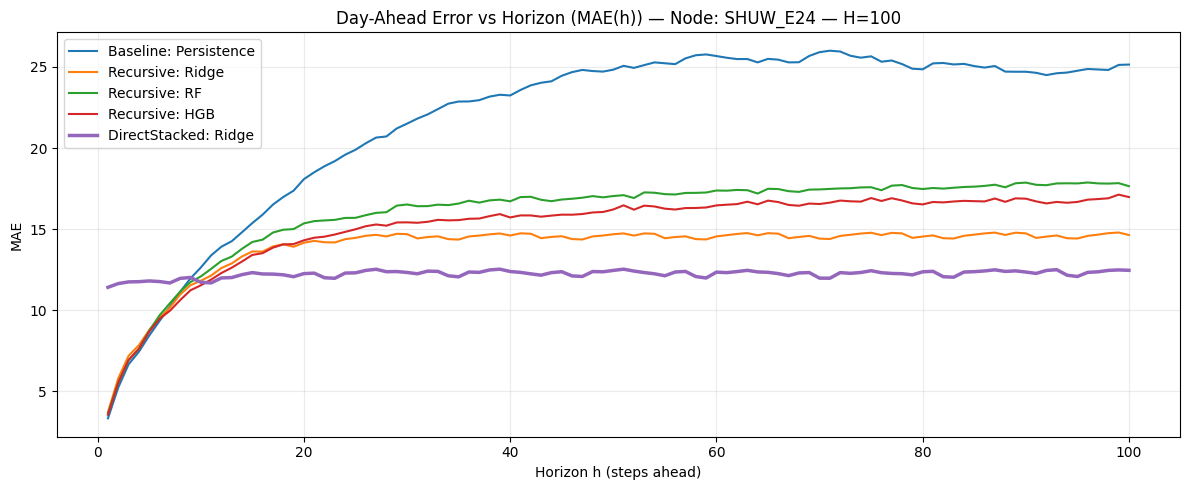


Best model (by TRAIN backtest day-ahead MAE): Ridge
Holdout Recursive metrics: {'MAE': 13.880037530867574, 'RMSE': 19.05096359970545, 'R2': 0.5316308100938192}
Holdout DirectStacked metrics: {'node': 'SHUW_E24', 'approach': 'DirectStacked', 'model': 'Ridge', 'MAE': 12.23581576810925, 'RMSE': 16.739506186150486, 'R2': 0.6376621910421326, 'fit_seconds': 5.832914352416992, 'best_params': "{'model__alpha': 233.57214690901213}"}


In [1]:
# ============================================================
# EXPERIMENT CELL (ONLY 1 NODE = HIGH with most power)
# - Select the single "HIGH" node = highest absolute median |P_MW| (after coverage filter)
# - Train/tune models on ONE-STEP target (t+1), but EVALUATE on DAY-AHEAD horizon H=100
# - Compare:
#     (1) Persistence baseline (day-ahead)
#     (2) Ridge / RandomForest / HistGradientBoosting with RECURSIVE 100-step rollout
#     (3) DIRECT Multi-Horizon (stacked) for the BEST model (by day-ahead MAE)
# - Final output: table + MAE(h) curves
# Metrics: MAE, RMSE, R2 (no MAPE)
# ============================================================

import warnings, math, time
warnings.filterwarnings("ignore")
warnings.filterwarnings(
    "ignore",
    message="X does not have valid feature names"
)



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

from src.config import CLEAN_TS_DIR


# =========================
# Settings
# =========================
TIMESTAMP_COL = "timestamp"
TARGET = "P_MW"

# if weather columns differ or are missing -> set RAW_FEATURES = []
RAW_FEATURES = ["wind_speed_mps", "solar_radiation_Wm2", "temperature_C"]

# autoregressive lags in 15-min steps
TARGET_LAGS = [1, 4, 8, 12, 24, 96]

# Fourier daily seasonality (24h = 96 steps)
FOURIER_K = 3
PERIOD_STEPS = 96

# Node selection
MIN_COVERAGE = 0.20

# Day-ahead horizon
H = 100  # ~25h (15-min steps)

# Splits
FINAL_HOLDOUT_FRAC = 0.20          # final day-ahead evaluation window
OUTER_SPLITS = 2                    # outer backtest folds (on remaining data)
INNER_SPLITS = 3                   # tuning CV folds

# Hyperparam search budget
N_ITER = 10
RANDOM_STATE = 42
N_JOBS = -1

# Computational knobs (day-ahead evaluation can be heavy)
ORIGIN_STRIDE = 12                  # evaluate every 4th origin (1h stride) to speed up
MAX_TEST_ORIGINS_PER_FOLD = 500   # optionally cap origins per fold (e.g. 2000) or leave None

# Learning curves are optional; keep off by default for day-ahead experiments
DO_LEARNING_CURVES = False


# =========================
# Helpers
# =========================
def evaluate(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mae = float(mean_absolute_error(y_true, y_pred))
    rmse = float(math.sqrt(mean_squared_error(y_true, y_pred)))
    r2 = float(r2_score(y_true, y_pred))
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

def add_time_features(df):
    ts = pd.to_datetime(df[TIMESTAMP_COL], utc=False)
    df["hour"] = ts.dt.hour
    df["dayofweek"] = ts.dt.dayofweek
    df["month"] = ts.dt.month

    df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
    df["dow_sin"]  = np.sin(2 * np.pi * df["dayofweek"] / 7)
    df["dow_cos"]  = np.cos(2 * np.pi * df["dayofweek"] / 7)
    df["month_sin"]= np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"]= np.cos(2 * np.pi * df["month"] / 12)
    return df

def add_fourier_features(df, period_steps=PERIOD_STEPS, K=FOURIER_K, prefix="day"):
    step_idx = (np.arange(len(df), dtype=float) % period_steps)
    for k in range(1, K + 1):
        df[f"{prefix}_sin{k}"] = np.sin(2 * np.pi * k * step_idx / period_steps)
        df[f"{prefix}_cos{k}"] = np.cos(2 * np.pi * k * step_idx / period_steps)
    return df

def add_target_lags(df, target_col, lags):
    for L in lags:
        df[f"{target_col}_lag{L}"] = df[target_col].shift(L)
    return df

def prepare_df(df_raw):
    df = df_raw.copy()
    df[TIMESTAMP_COL] = pd.to_datetime(df[TIMESTAMP_COL], utc=False)
    df = df.sort_values(TIMESTAMP_COL).reset_index(drop=True)

    df = add_time_features(df)
    df = add_fourier_features(df)
    df = add_target_lags(df, TARGET, TARGET_LAGS)

    # one-step target
    df["target_1"] = df[TARGET].shift(-1)

    present_feats = [c for c in RAW_FEATURES if c in df.columns]
    time_feats = ["hour_sin","hour_cos","dow_sin","dow_cos","month_sin","month_cos"]
    fourier_feats = [f"day_sin{k}" for k in range(1, FOURIER_K+1)] + [f"day_cos{k}" for k in range(1, FOURIER_K+1)]
    lag_feats = [f"{TARGET}_lag{L}" for L in TARGET_LAGS]

    exog_cols = present_feats + time_feats + fourier_feats
    lag_cols = lag_feats
    feature_cols = exog_cols + lag_cols

    df_model = df.dropna(subset=feature_cols + ["target_1", TARGET]).copy()
    df_model = df_model.reset_index(drop=True)
    return df_model, feature_cols, exog_cols, lag_cols, present_feats

def make_models_and_spaces():
    models = {}

    models["Ridge"] = (
        Pipeline([("scaler", StandardScaler()), ("model", Ridge(random_state=RANDOM_STATE))]),
        {"model__alpha": np.logspace(-3, 3, 20).tolist()},
    )

    models["RF"] = (
        RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS),
        {
            "n_estimators": [200, 400, 800],
            "max_depth": [None, 8, 12, 16, 24],
            "min_samples_leaf": [1, 2, 5, 10],
            "max_features": ["sqrt", 0.5, 0.8, None],
        },
    )

    models["HGB"] = (
        HistGradientBoostingRegressor(random_state=RANDOM_STATE),
        {
            "learning_rate": [0.03, 0.05, 0.08, 0.1],
            "max_depth": [None, 6, 10, 14],
            "max_leaf_nodes": [31, 63, 127],
            "min_samples_leaf": [10, 20, 50],
            "l2_regularization": [0.0, 0.1, 1.0],
        },
    )

    return models

# ------------------------------------------------------------
# Day-ahead evaluation (Recursive) for a model trained on one-step:
# model predicts y(t+1) from features at time t.
# For horizon k we simulate k steps ahead and feed predictions into lag features.
# Exogenous/time/fourier features are taken from the dataset at each step (assumed known for evaluation).
# ------------------------------------------------------------
def _update_lags_from_history(lag_cols, lag_steps, history_values):
    # history_values: dict {step: value} for step=1..max_lag where step=1 means last value y(t)
    # return lag feature vector aligned to lag_cols
    return np.array([history_values[int(col.split("lag")[1])] for col in lag_cols], dtype=float)

def evaluate_day_ahead_recursive(
    model, df_model, feature_cols, exog_cols, lag_cols, H=100,
    origin_indices=None, origin_stride=1
):
    # We evaluate from "origin" indices j where true future values exist up to j+H
    n = len(df_model)
    max_origin = n - H - 1  # need y at j+H
    if max_origin <= 0:
        raise ValueError(f"Not enough data for H={H}. n={n}")

    if origin_indices is None:
        origin_indices = np.arange(0, max_origin + 1, origin_stride, dtype=int)
    else:
        origin_indices = np.asarray(origin_indices, dtype=int)
        origin_indices = origin_indices[origin_indices <= max_origin]

    # Store per-h errors
    abs_errors_h = [[] for _ in range(H)]
    sq_errors_h = [[] for _ in range(H)]
    y_true_all = []
    y_pred_all = []

    # Precompute lag steps from col names
    lag_steps = [int(c.split("lag")[1]) for c in lag_cols]
    max_lag = max(lag_steps)

    for j in origin_indices:
        # Initialize history values from REAL series at origin time
        # Define "origin time" as df_model index j, corresponding to y(t) = P_MW at that index
        # For recursive, step1 prediction uses features at time j.
        history = {}
        # history[1] should be y(t) = P_MW at index j
        # history[L] should be y(t-L+1) = P_MW at index j-(L-1)
        for L in range(1, max_lag + 1):
            idx = j - (L - 1)
            if idx < 0:
                history[L] = np.nan
            else:
                history[L] = float(df_model[TARGET].iloc[idx])
        if any(np.isnan(history[L]) for L in lag_steps):
            continue

        # Simulate k=1..H
        for k in range(1, H + 1):
            step_idx = j + (k - 1)  # features at time t+(k-1)
            # Build feature row
            exog = df_model.loc[step_idx, exog_cols].astype(float).values if exog_cols else np.array([], dtype=float)
            lag_vec = _update_lags_from_history(lag_cols, lag_steps, history)
            x = np.concatenate([exog, lag_vec]).reshape(1, -1)

            y_hat = float(model.predict(x)[0])

            # True is y(t+k) = P_MW at index j+k
            y_true = float(df_model[TARGET].iloc[j + k])

            err = y_true - y_hat
            abs_errors_h[k-1].append(abs(err))
            sq_errors_h[k-1].append(err * err)

            y_true_all.append(y_true)
            y_pred_all.append(y_hat)

            # Update history: shift lags by 1 and insert prediction as new y(t) for next step
            # history[1] becomes predicted y(t+1) etc.
            for L in range(max_lag, 1, -1):
                history[L] = history[L-1]
            history[1] = y_hat

    # Aggregate
    mae_h = np.array([np.mean(v) if len(v) else np.nan for v in abs_errors_h], dtype=float)
    rmse_h = np.array([math.sqrt(np.mean(v)) if len(v) else np.nan for v in sq_errors_h], dtype=float)

    # Overall metrics across all horizons and origins
    overall = evaluate(np.array(y_true_all), np.array(y_pred_all))
    return overall, mae_h, rmse_h

# ------------------------------------------------------------
# Persistence baseline for day-ahead:
# Predict all horizons with y(t) (constant)
# ------------------------------------------------------------
def evaluate_day_ahead_persistence(df_model, H=100, origin_stride=1):
    n = len(df_model)
    max_origin = n - H - 1
    origin_indices = np.arange(0, max_origin + 1, origin_stride, dtype=int)

    abs_errors_h = [[] for _ in range(H)]
    sq_errors_h = [[] for _ in range(H)]
    y_true_all, y_pred_all = [], []

    for j in origin_indices:
        y0 = float(df_model[TARGET].iloc[j])  # y(t)
        for k in range(1, H + 1):
            y_true = float(df_model[TARGET].iloc[j + k])
            y_hat = y0
            err = y_true - y_hat
            abs_errors_h[k-1].append(abs(err))
            sq_errors_h[k-1].append(err * err)
            y_true_all.append(y_true)
            y_pred_all.append(y_hat)

    mae_h = np.array([np.mean(v) if len(v) else np.nan for v in abs_errors_h], dtype=float)
    rmse_h = np.array([math.sqrt(np.mean(v)) if len(v) else np.nan for v in sq_errors_h], dtype=float)
    overall = evaluate(np.array(y_true_all), np.array(y_pred_all))
    return overall, mae_h, rmse_h

# ------------------------------------------------------------
# Direct Multi-Horizon (Stacked) for ONE model:
# Train single model on rows: (origin t, horizon h) -> y(t+h)
# Features:
#   - lag features from origin time t (history)
#   - exogenous/time/fourier from TARGET time (t+h)
#   - horizon feature h
# ------------------------------------------------------------
def build_stacked_direct_dataset(df_model, exog_cols, lag_cols, H=100, origin_stride=4):
    n = len(df_model)
    max_origin = n - H - 1
    origins = np.arange(0, max_origin + 1, origin_stride, dtype=int)

    X_rows = []
    y_rows = []

    for j in origins:
        lag_vec = df_model.loc[j, lag_cols].astype(float).values
        if np.any(np.isnan(lag_vec)):
            continue

        for h in range(1, H + 1):
            tgt_idx = j + h  # time of target y(t+h)
            exog_vec = df_model.loc[tgt_idx, exog_cols].astype(float).values if exog_cols else np.array([], dtype=float)

            # horizon features (simple + normalized)
            h_feat = np.array([h, h / H], dtype=float)

            x = np.concatenate([exog_vec, lag_vec, h_feat])
            X_rows.append(x)
            y_rows.append(float(df_model[TARGET].iloc[tgt_idx]))

    Xs = np.asarray(X_rows, dtype=float)
    ys = np.asarray(y_rows, dtype=float)
    return Xs, ys

def evaluate_day_ahead_direct(model, df_model, exog_cols, lag_cols, H=100, origin_stride=1):
    n = len(df_model)
    max_origin = n - H - 1
    origin_indices = np.arange(0, max_origin + 1, origin_stride, dtype=int)

    abs_errors_h = [[] for _ in range(H)]
    sq_errors_h = [[] for _ in range(H)]
    y_true_all, y_pred_all = [], []

    for j in origin_indices:
        lag_vec = df_model.loc[j, lag_cols].astype(float).values
        if np.any(np.isnan(lag_vec)):
            continue

        # predict all horizons
        X_batch = []
        y_true_batch = []
        for h in range(1, H + 1):
            tgt_idx = j + h
            exog_vec = df_model.loc[tgt_idx, exog_cols].astype(float).values if exog_cols else np.array([], dtype=float)
            h_feat = np.array([h, h / H], dtype=float)
            X_batch.append(np.concatenate([exog_vec, lag_vec, h_feat]))
            y_true_batch.append(float(df_model[TARGET].iloc[tgt_idx]))

        X_batch = np.asarray(X_batch, dtype=float)
        y_true_batch = np.asarray(y_true_batch, dtype=float)

        y_hat_batch = model.predict(X_batch).astype(float)

        for h in range(1, H + 1):
            err = y_true_batch[h-1] - y_hat_batch[h-1]
            abs_errors_h[h-1].append(abs(err))
            sq_errors_h[h-1].append(err * err)
            y_true_all.append(y_true_batch[h-1])
            y_pred_all.append(y_hat_batch[h-1])

    mae_h = np.array([np.mean(v) if len(v) else np.nan for v in abs_errors_h], dtype=float)
    rmse_h = np.array([math.sqrt(np.mean(v)) if len(v) else np.nan for v in sq_errors_h], dtype=float)
    overall = evaluate(np.array(y_true_all), np.array(y_pred_all))
    return overall, mae_h, rmse_h


# =========================
# 0) Select ONLY the single HIGH node (most power)
#    -> define "power" as abs(median P_MW) and pick maximum
# =========================
meas_dir = Path(CLEAN_TS_DIR)
files = sorted(meas_dir.glob("*_hist_clean.csv"))
assert files, f"Keine *_hist_clean.csv in {meas_dir}"

rows = []
for p in files:
    node_id = p.stem.replace("_hist_clean", "")
    df = pd.read_csv(p, parse_dates=[TIMESTAMP_COL]).sort_values(TIMESTAMP_COL)
    if TARGET not in df.columns:
        continue
    s = df[TARGET].astype(float)

    coverage = 1.0 - s.isna().mean()
    if coverage < MIN_COVERAGE:
        continue

    med = float(s.median(skipna=True))
    rows.append({
        "node_id": node_id,
        "coverage": float(coverage),
        "mean": float(s.mean(skipna=True)),
        "median": med,
        "abs_median": abs(med),
        "p95": float(s.quantile(0.95)),
        "std": float(s.std(skipna=True)),
        "n": int(len(s)),
    })

stats = pd.DataFrame(rows)
assert not stats.empty, "Nach Coverage-Filter keine Nodes übrig. MIN_COVERAGE senken."

stats = stats.sort_values("abs_median").reset_index(drop=True)
high_node = stats.iloc[-1]["node_id"]

print("Auswahlkriterium: MAX abs(median(P_MW)) mit MIN_COVERAGE", MIN_COVERAGE)
print("HIGH node:", high_node)
display(stats.tail(10))


# =========================
# 1) Load and prepare data for HIGH node
# =========================
path = meas_dir / f"{high_node}_hist_clean.csv"
df_raw = pd.read_csv(path)

df_model, feature_cols, exog_cols, lag_cols, present_feats = prepare_df(df_raw)
print(f"\nPrepared supervised base for {high_node}: n={len(df_model)}")
print("Exog present:", present_feats)
print("Feature cols:", len(feature_cols), "(exog/time/fourier:", len(exog_cols), ", lags:", len(lag_cols), ")")

assert len(df_model) > (H + 500), f"Time series too short for H={H}. n={len(df_model)}"


# =========================
# 2) Define train/holdout split for FINAL comparison (day-ahead)
# =========================
n = len(df_model)
split_idx = int((1.0 - FINAL_HOLDOUT_FRAC) * n)

# Ensure holdout has enough room for H-step evaluation
# We'll evaluate origins only inside the holdout window such that j+H is inside holdout
holdout_start = split_idx
holdout_end = n - 1
holdout_max_origin = (n - H - 1)
if holdout_start > holdout_max_origin:
    raise ValueError("Holdout window too small for day-ahead evaluation. Reduce FINAL_HOLDOUT_FRAC or H.")

print(f"\nFinal split: train [0:{split_idx}) | holdout [{split_idx}:{n})")
print(f"Holdout origins allowed up to index {holdout_max_origin} (H={H}).")


# =========================
# 3) Baseline: Persistence day-ahead (on holdout)
# =========================
# Evaluate only holdout origins (stride applied)
holdout_origins = np.arange(holdout_start, holdout_max_origin + 1, ORIGIN_STRIDE, dtype=int)
baseline_overall, baseline_mae_h, baseline_rmse_h = evaluate_day_ahead_persistence(
    df_model=df_model.iloc[holdout_start:].reset_index(drop=True),
    H=H,
    origin_stride=ORIGIN_STRIDE
)
# Note: We evaluate baseline on a reindexed holdout-only df_model. That's OK (origins are within holdout).


# =========================
# 4) Model selection on TRAIN using outer backtesting:
#    - Tune on one-step (inner CV)
#    - Evaluate day-ahead recursively on outer test segments
# =========================
models = make_models_and_spaces()

X_all = df_model[feature_cols].astype(float)
y_all = df_model["target_1"].astype(float)

# Only use TRAIN part for selection/backtesting
X_train_full = X_all.iloc[:split_idx].reset_index(drop=True)
y_train_full = y_all.iloc[:split_idx].reset_index(drop=True)
df_train_full = df_model.iloc[:split_idx].reset_index(drop=True)

# To evaluate H-step inside folds, we need origins where j+H exists inside the fold test region.
# We'll do: for each outer fold, evaluate on test origins within that fold.
outer = TimeSeriesSplit(n_splits=OUTER_SPLITS)

cv_rows = []

print("\n" + "="*90)
print("MODEL SELECTION (TRAIN): tune one-step, evaluate day-ahead recursive on outer folds")
print("="*90)

for model_name, (estimator, param_dist) in models.items():
    fold_maes = []
    fold_rmses = []
    fold_r2s = []
    fold_secs = []

    for fold_i, (tr_idx, te_idx) in enumerate(outer.split(X_train_full), start=1):
        X_tr, y_tr = X_train_full.iloc[tr_idx], y_train_full.iloc[tr_idx]
        df_tr = df_train_full.iloc[tr_idx].reset_index(drop=True)

        # Inner tuning on one-step (fast)
        inner = TimeSeriesSplit(n_splits=INNER_SPLITS)
        search = RandomizedSearchCV(
            estimator=estimator,
            param_distributions=param_dist,
            n_iter=N_ITER,
            scoring="neg_mean_absolute_error",
            cv=inner,
            random_state=RANDOM_STATE,
            n_jobs=N_JOBS,
            verbose=0,
        )

        t0 = time.time()
        search.fit(X_tr, y_tr)
        fit_s = time.time() - t0

        best = search.best_estimator_

        # Day-ahead recursive evaluation on outer test window:
        # Use df corresponding to the concatenation of (train_end .. test_end) so recursion can start at test origins.
        # For a strict test-only evaluation, we evaluate origins that are inside the test index range AND have future inside the same test range.
        df_fold = df_train_full.iloc[np.r_[tr_idx, te_idx]].reset_index(drop=True)

        # test region in df_fold is the tail segment of length len(te_idx)
        test_start = len(tr_idx)
        test_end = len(tr_idx) + len(te_idx) - 1
        max_origin = len(df_fold) - H - 1
        origin_start = test_start
        origin_end = min(max_origin, test_end - H)  # ensure y(t+H) still in test

        if origin_end < origin_start:
            # If fold test window is too short for H=100, skip this fold for day-ahead scoring
            continue

        origins = np.arange(origin_start, origin_end + 1, ORIGIN_STRIDE, dtype=int)
        if MAX_TEST_ORIGINS_PER_FOLD is not None and len(origins) > MAX_TEST_ORIGINS_PER_FOLD:
            origins = origins[:MAX_TEST_ORIGINS_PER_FOLD]

        overall, mae_h, rmse_h = evaluate_day_ahead_recursive(
            model=best,
            df_model=df_fold,
            feature_cols=feature_cols,
            exog_cols=exog_cols,
            lag_cols=lag_cols,
            H=H,
            origin_indices=origins,
            origin_stride=ORIGIN_STRIDE
        )

        fold_maes.append(overall["MAE"])
        fold_rmses.append(overall["RMSE"])
        fold_r2s.append(overall["R2"])
        fold_secs.append(fit_s)

        cv_rows.append({
            "model": model_name,
            "outer_fold": fold_i,
            "dayahead_MAE": overall["MAE"],
            "dayahead_RMSE": overall["RMSE"],
            "dayahead_R2": overall["R2"],
            "fit_seconds": float(fit_s),
            "best_params": str(search.best_params_),
        })

    # Mean summary row
    if len(fold_maes):
        cv_rows.append({
            "model": model_name,
            "outer_fold": "MEAN",
            "dayahead_MAE": float(np.mean(fold_maes)),
            "dayahead_RMSE": float(np.mean(fold_rmses)),
            "dayahead_R2": float(np.mean(fold_r2s)),
            "fit_seconds": float(np.mean(fold_secs)) if len(fold_secs) else np.nan,
            "best_params": "(varies per fold)",
        })

cv_df = pd.DataFrame(cv_rows)
print("\nOuter-fold day-ahead results (TRAIN backtest):")
display(cv_df)

mean_df = cv_df[cv_df["outer_fold"].astype(str) == "MEAN"].sort_values("dayahead_MAE")
print("\nModel ranking by day-ahead MAE (lower is better):")
display(mean_df[["model","dayahead_MAE","dayahead_RMSE","dayahead_R2","fit_seconds"]])

best_model_name = mean_df.iloc[0]["model"]
print("\nSelected BEST model by day-ahead MAE:", best_model_name)


# =========================
# 5) Final tuning on TRAIN (one-step) for each model, then FINAL holdout day-ahead eval (recursive)
# =========================
final_rows = []

print("\n" + "="*90)
print("FINAL HOLDOUT EVALUATION (DAY-AHEAD, RECURSIVE)")
print("="*90)

for model_name, (estimator, param_dist) in models.items():
    inner = TimeSeriesSplit(n_splits=INNER_SPLITS)
    search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_dist,
        n_iter=max(25, N_ITER),
        scoring="neg_mean_absolute_error",
        cv=inner,
        random_state=RANDOM_STATE,
        n_jobs=N_JOBS,
        verbose=0,
    )

    t0 = time.time()
    search.fit(X_train_full, y_train_full)
    fit_s = time.time() - t0

    best = search.best_estimator_

    # Evaluate on holdout segment using recursive day-ahead
    df_hold = df_model.iloc[holdout_start:].reset_index(drop=True)

    overall, mae_h, rmse_h = evaluate_day_ahead_recursive(
        model=best,
        df_model=df_hold,
        feature_cols=feature_cols,
        exog_cols=exog_cols,
        lag_cols=lag_cols,
        H=H,
        origin_indices=None,
        origin_stride=ORIGIN_STRIDE
    )

    final_rows.append({
        "node": high_node,
        "approach": "Recursive",
        "model": model_name,
        "MAE": overall["MAE"],
        "RMSE": overall["RMSE"],
        "R2": overall["R2"],
        "fit_seconds": float(fit_s),
        "best_params": str(search.best_params_),
        "mae_h": mae_h,
        "rmse_h": rmse_h,
    })

final_df = pd.DataFrame([{k:v for k,v in r.items() if k not in ("mae_h","rmse_h")} for r in final_rows]).sort_values("MAE")
print("\nFinal holdout (recursive) — sorted by MAE:")
display(final_df)

best_recursive_row = [r for r in final_rows if r["model"] == best_model_name][0]
best_recursive_mae_h = best_recursive_row["mae_h"]


# =========================
# 6) Direct Multi-Horizon (Stacked) only for BEST model
# =========================
print("\n" + "="*90)
print(f"DIRECT MULTI-HORIZON (STACKED) for BEST model: {best_model_name}")
print("="*90)

# Use the BEST model class but build a direct-model instance.
# We only implement Direct for HGB / RF / Ridge; but in practice Direct is most useful for HGB.
if best_model_name == "Ridge":
    direct_estimator = Pipeline([("scaler", StandardScaler()), ("model", Ridge(random_state=RANDOM_STATE))])
    direct_space = {"model__alpha": np.logspace(-3, 3, 20).tolist()}
elif best_model_name == "RF":
    direct_estimator = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS)
    direct_space = {
        "n_estimators": [200, 400],
        "max_depth": [None, 12, 24],
        "min_samples_leaf": [1, 5],
        "max_features": ["sqrt", 0.8],
    }
else:
    # HGB
    direct_estimator = HistGradientBoostingRegressor(random_state=RANDOM_STATE)
    direct_space = {
        "learning_rate": [0.03, 0.05, 0.08, 0.1],
        "max_depth": [None, 6, 10, 14],
        "max_leaf_nodes": [31, 63, 127],
        "min_samples_leaf": [10, 20, 50],
        "l2_regularization": [0.0, 0.1, 1.0],
    }

# Build stacked training data from TRAIN only
df_train_for_direct = df_model.iloc[:split_idx].reset_index(drop=True)
X_direct, y_direct = build_stacked_direct_dataset(
    df_model=df_train_for_direct,
    exog_cols=exog_cols,
    lag_cols=lag_cols,
    H=H,
    origin_stride=ORIGIN_STRIDE
)

print(f"Direct stacked training set: X={X_direct.shape}, y={y_direct.shape}")

# Tune direct model on a simple split-based CV (TimeSeriesSplit isn't directly meaningful in stacked (t,h) space),
# so we do a lightweight CV by splitting along row order (still chronological by origin construction).
direct_cv = TimeSeriesSplit(n_splits=INNER_SPLITS)
direct_search = RandomizedSearchCV(
    estimator=direct_estimator,
    param_distributions=direct_space,
    n_iter=max(25, N_ITER),
    scoring="neg_mean_absolute_error",
    cv=direct_cv,
    random_state=RANDOM_STATE,
    n_jobs=N_JOBS,
    verbose=0,
)

t0 = time.time()
direct_search.fit(X_direct, y_direct)
direct_fit_s = time.time() - t0
direct_best = direct_search.best_estimator_

# Evaluate direct on HOLDOUT
df_hold = df_model.iloc[holdout_start:].reset_index(drop=True)
direct_overall, direct_mae_h, direct_rmse_h = evaluate_day_ahead_direct(
    model=direct_best,
    df_model=df_hold,
    exog_cols=exog_cols,
    lag_cols=lag_cols,
    H=H,
    origin_stride=ORIGIN_STRIDE
)

direct_summary = {
    "node": high_node,
    "approach": "DirectStacked",
    "model": best_model_name,
    "MAE": direct_overall["MAE"],
    "RMSE": direct_overall["RMSE"],
    "R2": direct_overall["R2"],
    "fit_seconds": float(direct_fit_s),
    "best_params": str(direct_search.best_params_),
}


# =========================
# 7) Final comparison output (Baseline + Recursive models + Direct best)
# =========================
baseline_summary = {
    "node": high_node,
    "approach": "Baseline",
    "model": "Persistence",
    "MAE": baseline_overall["MAE"],
    "RMSE": baseline_overall["RMSE"],
    "R2": baseline_overall["R2"],
    "fit_seconds": 0.0,
    "best_params": "-",
}

final_compare = pd.DataFrame(
    [baseline_summary]
    + [{k:v for k,v in r.items() if k not in ("mae_h","rmse_h")} for r in final_rows]
    + [direct_summary]
).sort_values(["MAE","RMSE"])

print("\n" + "="*90)
print("FINAL COMPARISON (HOLDOUT, DAY-AHEAD H=100)")
print("="*90)
display(final_compare)

# -------------------------
# Plot: MAE(h) curves
# -------------------------
plt.figure(figsize=(12, 5))
plt.plot(np.arange(1, H+1), baseline_mae_h, label="Baseline: Persistence")

# recursive curves
for r in final_rows:
    plt.plot(np.arange(1, H+1), r["mae_h"], label=f"Recursive: {r['model']}")

# direct curve for best model
plt.plot(np.arange(1, H+1), direct_mae_h, linewidth=2.5, label=f"DirectStacked: {best_model_name}")

plt.title(f"Day-Ahead Error vs Horizon (MAE(h)) — Node: {high_node} — H={H}")
plt.xlabel("Horizon h (steps ahead)")
plt.ylabel("MAE")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: show summary numbers for recursive-best vs direct
print("\nBest model (by TRAIN backtest day-ahead MAE):", best_model_name)
print("Holdout Recursive metrics:", {k: best_recursive_row[k] for k in ["MAE","RMSE","R2"]})
print("Holdout DirectStacked metrics:", direct_summary)
